In [1]:
#Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt

password = getpass.getpass()



 ········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
query = '''

with forcast as (
select
        title,
        film_id, 
        rental_date,
        name
from sakila.film A 
join sakila.inventory B using(film_id)
join sakila.rental C using(inventory_id)
left join sakila.film_category D using(film_id)
left join sakila.category E using(category_id))

select * from forcast'''

#Read the data into a Pandas dataframe.
data = pd.read_sql_query(query, engine)

data.head()


,title,film_id,rental_date,name
0,ACADEMY DINOSAUR,1,2005-07-08 19:03:15,Documentary
1,ACADEMY DINOSAUR,1,2005-08-02 20:13:10,Documentary
2,ACADEMY DINOSAUR,1,2005-08-21 21:27:43,Documentary
3,ACADEMY DINOSAUR,1,2005-05-30 20:21:07,Documentary
4,ACADEMY DINOSAUR,1,2005-06-17 20:24:00,Documentary


In [3]:
#Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
data['title'].value_counts()


BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
JUGGLER HARDLY         32
                       ..
FULL FLATLINERS         5
BRAVEHEART HUMAN        5
HARDLY ROBBERS          4
MIXED DOORS             4
TRAIN BUNCH             4
Name: title, Length: 958, dtype: int64

In [4]:
data['name'].value_counts()


Sports         1179
Animation      1166
Action         1112
Sci-Fi         1101
Family         1096
Drama          1060
Documentary    1050
Foreign        1033
Games           969
Children        945
Comedy          941
New             940
Classics        939
Horror          846
Travel          837
Music           830
Name: name, dtype: int64

In [5]:
data.shape

(16044, 4)

In [6]:
data.dtypes

title                  object
film_id                 int64
rental_date    datetime64[ns]
name                   object
dtype: object

In [7]:
data.isna().sum()

title          0
film_id        0
rental_date    0
name           0
dtype: int64

In [13]:
#Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
def date_to_boolean(timestamp, target_month):
                    month_index = timestamp.month-1
                    return month_index ==  target_month -1
target_month = 5

data['is_target_month'] = data['rental_date'].apply(lambda x: date_to_boolean(x, target_month))

data.head()

,title,film_id,rental_date,name,is_target_month
0,ACADEMY DINOSAUR,1,2005-07-08 19:03:15,Documentary,False
1,ACADEMY DINOSAUR,1,2005-08-02 20:13:10,Documentary,False
2,ACADEMY DINOSAUR,1,2005-08-21 21:27:43,Documentary,False
3,ACADEMY DINOSAUR,1,2005-05-30 20:21:07,Documentary,True
4,ACADEMY DINOSAUR,1,2005-06-17 20:24:00,Documentary,False


In [9]:
data['is_target_month'].value_counts()

False    14888
True      1156
Name: is_target_month, dtype: int64

In [15]:
data.dtypes

title                      object
film_id                     int64
rental_date        datetime64[ns]
name                       object
is_target_month              bool
dtype: object

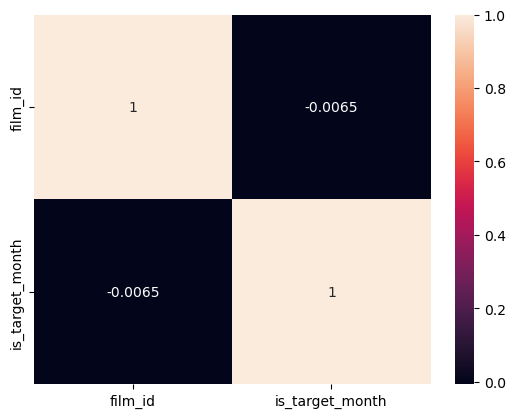

In [16]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
#Create a logistic regression model to predict this variable from the cleaned data.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the cleaned data into a DataFrame
df = data

In [20]:
# Encode the categorical variable 'name'
encoder = LabelEncoder()
df['name_encoded'] = encoder.fit_transform(df['name'])

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['film_id', 'name_encoded']], df['is_target_month'], test_size=0.4)

In [22]:
# Initialize the logistic regression model
logreg = LogisticRegression()

In [23]:
# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Evaluate the model on the testing data
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9306637581801184


In [11]:
#Evaluate the results.

In [26]:
predictions = logreg.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [27]:
y_test.value_counts()

False    5973
True      445
Name: is_target_month, dtype: int64